In [25]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report
#
import tensorflow as tf
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Dense # type of layer
from tensorflow.keras.activations import linear, relu, sigmoid,softmax #activation function
from tensorflow.keras import regularizers
#
from xgboost import XGBClassifier

In [2]:
df=pd.read_csv("/content/gld_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
df.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [16]:
corelation= df.corr()

<ipython-input-16-6b1956047a46>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation= df.corr()


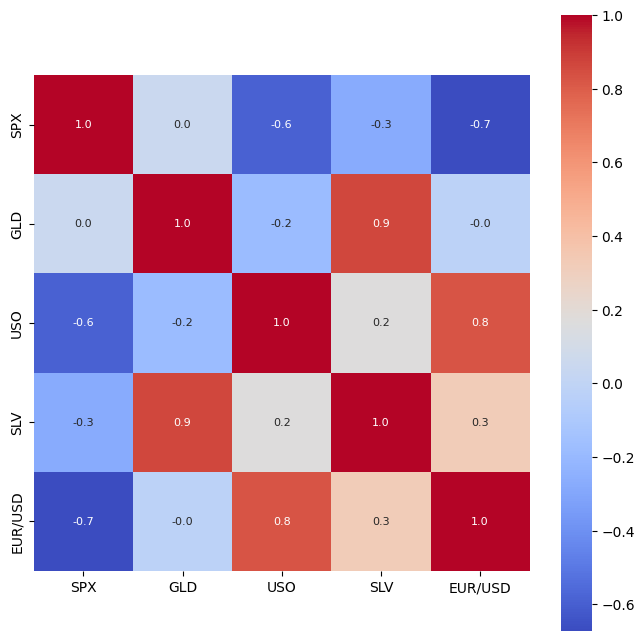

In [19]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.heatmap(corelation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size": 8}, cmap="coolwarm")
plt.show()

In [20]:
print(corelation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


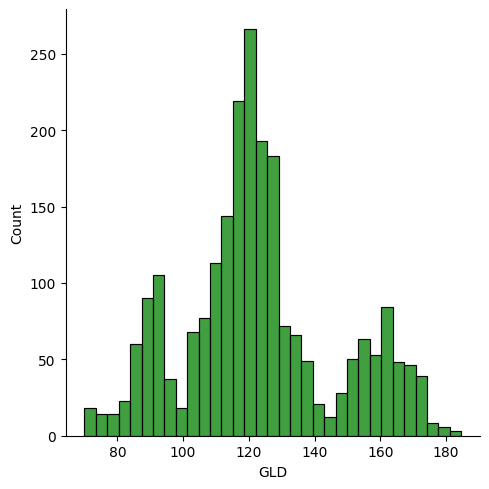

In [22]:
sns.displot(df['GLD'],color="green")

In [24]:
X=df.drop(['GLD',"Date"],axis=1)
Y=df['GLD']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [30]:
model= RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)

RandomForestRegressor()

In [31]:
pred_test=model.predict(x_test)
acc= r2_score(pred_test,y_test)
print(acc*100)

98.91366968259159


Neural network

In [70]:
m,n=x_train.shape
lamb=0.0001

In [71]:
tf.random.set_seed(1244)
model1=Sequential(
    [
        tf.keras.layers.InputLayer((n,)),
        Dense(25, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(lamb), name="L1"),
        Dense(15, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(lamb), name="L2"),
        Dense(5, activation="relu",kernel_regularizer=tf.keras.regularizers.l2(lamb), name="L3"),
        Dense(1, activation="linear")
    ]
)
model1.compile(
    loss= tf.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [ ]:
# Assuming you have x_train and y_train prepared appropriately

# Training the model
history = model1.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

# Evaluate the model on test data (if available)
# x_test and y_test represent your test data
test_loss = model1.evaluate(x_test, y_test)
print("Test Loss:", test_loss)


In [73]:
pred_test1=model1.predict(x_test)
acc= r2_score(pred_test1,y_test)
print(acc*100)

15/15 [==============================] - 0s 1ms/step
93.00857476939834


In [74]:
y_test=list(y_test)

In [85]:
mse_neural_network=mean_squared_error(pred_test1,y_test)
mse_random_forest = mean_squared_error(pred_test,y_test)

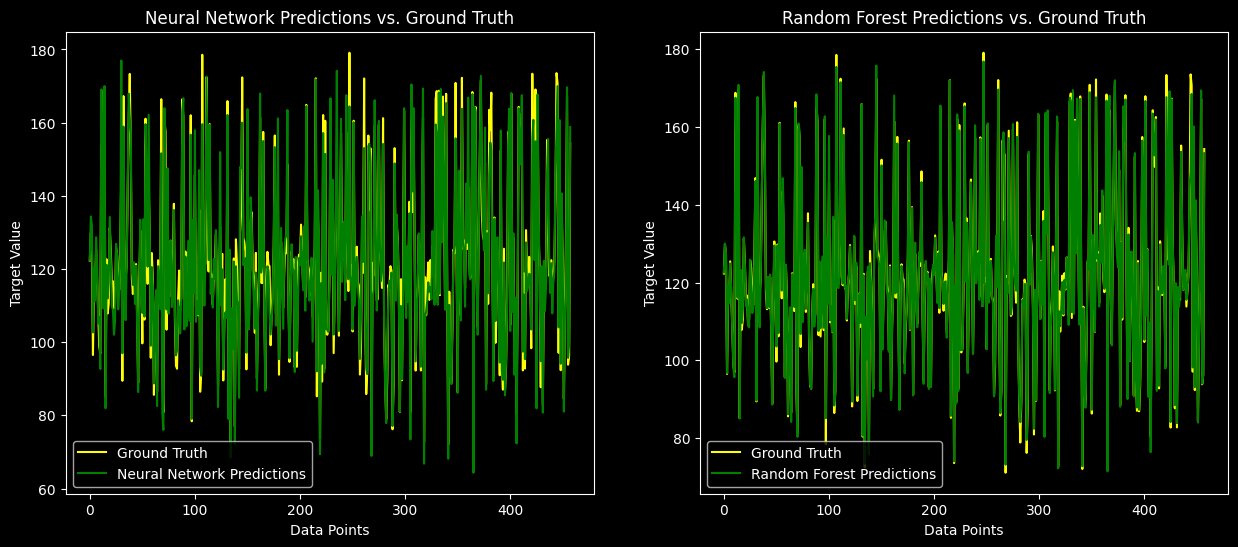

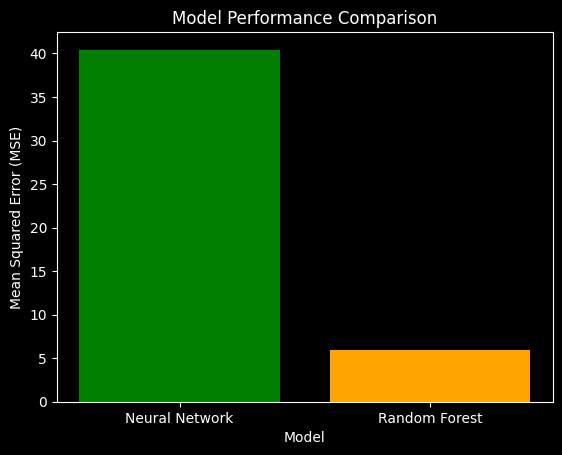

In [86]:
plt.style.use('dark_background')

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the ground truth and neural network predictions in the first subplot
axes[0].plot(y_test, c="yellow", label="Ground Truth")
axes[0].plot(pred_test1, c="green", label="Neural Network Predictions")
axes[0].set_xlabel("Data Points")
axes[0].set_ylabel("Target Value")
axes[0].set_title("Neural Network Predictions vs. Ground Truth")
axes[0].legend()

# Plot the ground truth and random forest predictions in the second subplot
axes[1].plot(y_test, c="yellow", label="Ground Truth")
axes[1].plot(pred_test, c="green", label="Random Forest Predictions")
axes[1].set_xlabel("Data Points")
axes[1].set_ylabel("Target Value")
axes[1].set_title("Random Forest Predictions vs. Ground Truth")
axes[1].legend()

# Show the subplots
plt.show()

# Create a bar graph to compare the performance of the two models
model_names = ["Neural Network", "Random Forest"]
mse_scores = [mse_neural_network, mse_random_forest]  # Replace with the actual MSE scores for each model

# Set the dark background style
plt.style.use('dark_background')

# Create a bar graph
plt.bar(model_names, mse_scores, color=["green", "orange"])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Model Performance Comparison")
plt.show()